# Loading Libraries

In [2]:
import skfda
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from skfda.exploratory.depth import ModifiedBandDepth, IntegratedDepth
from skfda.exploratory.visualization import Boxplot

from skfda.exploratory.visualization.clustering import (
    ClusterMembershipLinesPlot,
    ClusterMembershipPlot,
    ClusterPlot,
)
from skfda.ml.clustering import FuzzyCMeans, KMeans

from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction.feature_extraction import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


# Loading Data

In [4]:
def wf(x):
    return '/Users/pruthvibharadwaj/Desktop/Spring 22/MA679 - ML/Project/Data/' + x

In [5]:
GRFx = pd.read_csv(wf('GRFx.csv'), header = None)
GRFy = pd.read_csv(wf('GRFy.csv'), header = None)
GRFz = pd.read_csv(wf('GRFz.csv'), header = None)

V_GRF_stance_N = pd.read_csv(wf('V_GRF_stance_N.csv'), header = None)
ML_GRF_stance_N = pd.read_csv(wf('ML_GRF_stance_N.csv'), header = None)
AP_GRF_stance_N = pd.read_csv(wf('AP_GRF_stance_N.csv'), header = None)

COPx = pd.read_csv(wf('COPx.csv'), header = None)
COPy = pd.read_csv(wf('COPy.csv'), header = None)

COPx_stance = pd.read_csv(wf('COPx_stance.csv'), header = None)
COPy_stance = pd.read_csv(wf('COPy_stance.csv'), header = None)

Mx = pd.read_csv(wf('Mx.csv'), header = None)
My = pd.read_csv(wf('My.csv'), header = None)
Mz = pd.read_csv(wf('Mz.csv'), header = None)

In [5]:
IDinfo = pd.read_csv(wf('IDinfo.csv'))
discrete = pd.read_csv(wf('discrete.csv'))

# Transforming Data to FDataGrid object

In [6]:
#Defining a list of grid points
grid_points_100 = list(range(1,101))
grid_points_2990 = list(range(1,2991))

In [7]:
#Creating an skfda object aav a 
V_GRF_stance_N_matrix = V_GRF_stance_N.to_numpy()

V_GRF_stance_N_fd = skfda.FDataGrid(
    data_matrix=V_GRF_stance_N_matrix,
    grid_points=grid_points_100,
)


ML_GRF_stance_N_matrix = ML_GRF_stance_N.to_numpy()

ML_GRF_stance_N_fd = skfda.FDataGrid(
    data_matrix=ML_GRF_stance_N_matrix,
    grid_points=grid_points_100,
)

AP_GRF_stance_N_matrix = AP_GRF_stance_N.to_numpy()

AP_GRF_stance_N_fd = skfda.FDataGrid(
    data_matrix=AP_GRF_stance_N_matrix,
    grid_points=grid_points_100,
)

COPx_stance_matrix = COPx_stance.to_numpy()

COPx_stance_fd = skfda.FDataGrid(
    data_matrix=COPx_stance_matrix,
    grid_points=grid_points_100,
)

COPy_stance_matrix = COPy_stance.to_numpy()

COPy_stance_fd = skfda.FDataGrid(
    data_matrix=COPy_stance_matrix,
    grid_points=grid_points_100,
)

# FPCA

## V_GRF_stance_N

Text(0.5, 1.0, 'Mean of V_GRF_Stance_N')

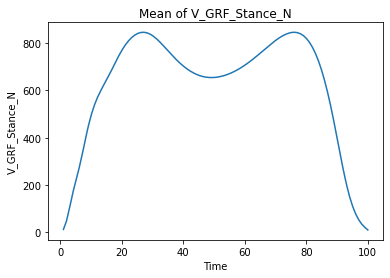

In [9]:
# Plotting mean
V_GRF_stance_N_mean = skfda.exploratory.stats.mean(V_GRF_stance_N_fd)
V_GRF_stance_N_mean.plot()
plt.xlabel('Time')
plt.ylabel('V_GRF_Stance_N')
plt.title('Mean of V_GRF_Stance_N')

In [10]:
#Basis representation
basis = skfda.representation.basis.BSpline(n_basis=7)
V_GRF_stance_N_basis_fd = V_GRF_stance_N_fd.to_basis(basis)

In [11]:
#Fitting BSpline FPCA model
V_GRF_stance_N_fpca_bs = FPCA(n_components=2)
V_GRF_stance_N_fpca_bs.fit(V_GRF_stance_N_basis_fd)

FPCA(n_components=2)

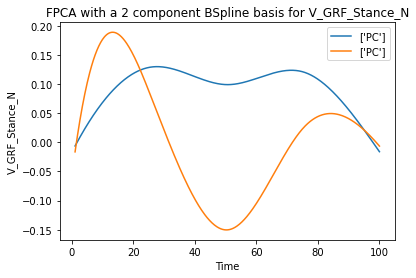

In [12]:
#Plotting FPCA components
V_GRF_stance_N_fpca_bs.components_.plot(label = ['PC'])

plt.xlabel('Time')
plt.ylabel('V_GRF_Stance_N')
plt.title('FPCA with a 2 component BSpline basis for V_GRF_Stance_N')
plt.legend()

In [13]:
V_GRF_stance_N_fpca_bs.components_

FDataBasis(
    basis=BSpline(domain_range=((1.0, 100.0),), n_basis=7, order=4, knots=(1.0, 25.75, 50.5, 75.25, 100.0)),
    coefficients=[[-0.0062071   0.0751739   0.17130277  0.06355661  0.16912698  0.04647218
      -0.01603696]
     [-0.01634007  0.29403842  0.08520397 -0.27209634  0.10119946  0.04447797
      -0.00641904]],
    dataset_name=None,
    argument_names=(None,),
    coordinate_names=(None,),
    extrapolation=None)

In [14]:
#Total variance explained
sum(V_GRF_stance_N_fpca_bs.explained_variance_ratio_)

0.9328844951906443

In [49]:
#Component Loading
V_GRF_stance_N_fpca_bs.explained_variance_ratio_

array([0.80431283, 0.12857167])

In [15]:
#Transforming data into FPCA representation
V_GRF_stance_N_fpca_bs_proj = V_GRF_stance_N_fpca_bs.transform(V_GRF_stance_N_basis_fd)

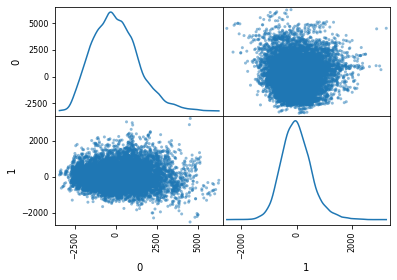

In [153]:
#Plotting Scatterplot of observations on FPC axes
_ = pd.plotting.scatter_matrix(pd.DataFrame(V_GRF_stance_N_fpca_bs_proj), diagonal='kde')


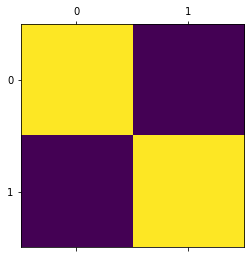

In [16]:
_ = plt.matshow(pd.DataFrame(V_GRF_stance_N_fpca_bs_proj).corr())

In [17]:
pd.DataFrame(V_GRF_stance_N_fpca_bs_proj).corr()

,0,1
0,1.000000e+00,-8.939724e-16
1,-8.939724e-16,1.000000e+00


## ML_GRF_stance_N

Text(0.5, 1.0, 'Mean of ML_GRF_Stance_N')

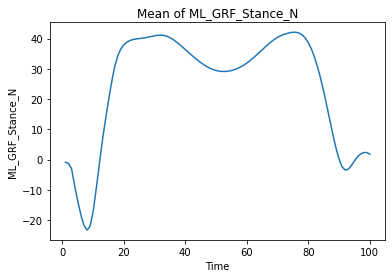

In [18]:
# Plotting mean
ML_GRF_stance_N_mean = skfda.exploratory.stats.mean(ML_GRF_stance_N_fd)
ML_GRF_stance_N_mean.plot()
plt.xlabel('Time')
plt.ylabel('ML_GRF_Stance_N')
plt.title('Mean of ML_GRF_Stance_N')

In [19]:
# Basis representation
basis = skfda.representation.basis.BSpline(n_basis=7)
ML_GRF_stance_N_basis_fd = ML_GRF_stance_N_fd.to_basis(basis)

In [20]:
#Fitting BSpline FPCA model
ML_GRF_stance_N_fpca_bs = FPCA(n_components=3)
ML_GRF_stance_N_fpca_bs.fit(ML_GRF_stance_N_basis_fd)

FPCA()

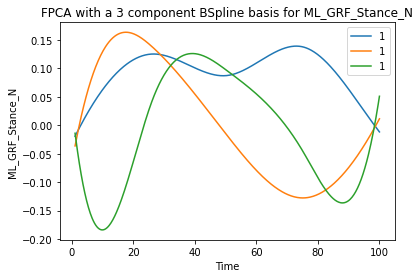

In [154]:
#Plotting FPCA components

ML_GRF_stance_N_fpca_bs.components_.plot(label = '1')
plt.xlabel('Time')
plt.ylabel('ML_GRF_Stance_N')
plt.title('FPCA with a 3 component BSpline basis for ML_GRF_Stance_N')
plt.legend()

In [32]:
#Total variance explained

sum(ML_GRF_stance_N_fpca_bs.explained_variance_ratio_)

0.9209152707232897

In [33]:
#Component Loading

ML_GRF_stance_N_fpca_bs.explained_variance_ratio_

array([0.7750229 , 0.08293988, 0.06295249])

In [21]:
#Transforming data into FPCA representation

ML_GRF_stance_N_fpca_bs_proj = ML_GRF_stance_N_fpca_bs.transform(ML_GRF_stance_N_basis_fd)

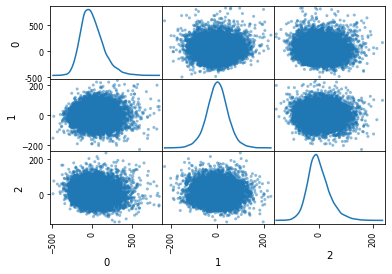

In [37]:
#Plotting Scatterplot of observations on FPC axes

_ = pd.plotting.scatter_matrix(pd.DataFrame(ML_GRF_stance_N_fpca_bs_proj), diagonal='kde')

In [23]:
pd.DataFrame(ML_GRF_stance_N_fpca_bs_proj).corr()

,0,1,2
0,1.000000e+00,6.476568e-16,-1.933537e-16
1,6.476568e-16,1.000000e+00,1.893314e-16
2,-1.933537e-16,1.893314e-16,1.000000e+00


## AP_GRF_stance_N

Text(0.5, 1.0, 'Mean of AP_GRF_Stance_N')

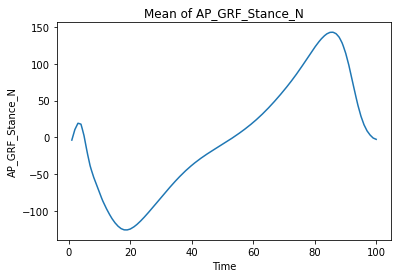

In [25]:
# Plotting mean
AP_GRF_stance_N_mean = skfda.exploratory.stats.mean(AP_GRF_stance_N_fd)
AP_GRF_stance_N_mean.plot()
plt.xlabel('Time')
plt.ylabel('AP_GRF_Stance_N')
plt.title('Mean of AP_GRF_Stance_N')

In [26]:
#Basis representation
basis = skfda.representation.basis.BSpline(n_basis=7)
AP_GRF_stance_N_basis_fd = AP_GRF_stance_N_fd.to_basis(basis)

In [27]:
#Fitting BSpline FPCA model
AP_GRF_stance_N_fpca_bs = FPCA(n_components=3)
AP_GRF_stance_N_fpca_bs.fit(AP_GRF_stance_N_basis_fd)

FPCA()

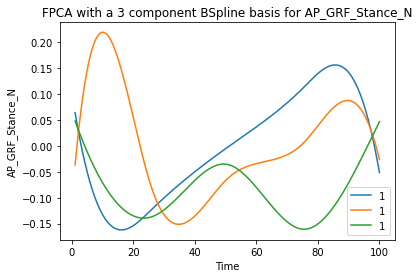

In [155]:
#Plotting FPCA components

AP_GRF_stance_N_fpca_bs.components_.plot(label = '1')
plt.xlabel('Time')
plt.ylabel('AP_GRF_Stance_N')
plt.title('FPCA with a 3 component BSpline basis for AP_GRF_Stance_N')
plt.legend()

In [95]:
#Total variance explained

sum(AP_GRF_stance_N_fpca_bs.explained_variance_ratio_)

0.9060748850091644

In [96]:
#Component Loading

AP_GRF_stance_N_fpca_bs.explained_variance_ratio_

array([0.74945852, 0.09416214, 0.06245423])

In [29]:
#Transforming data into FPCA representation

AP_GRF_stance_N_fpca_bs_proj = AP_GRF_stance_N_fpca_bs.transform(AP_GRF_stance_N_basis_fd)

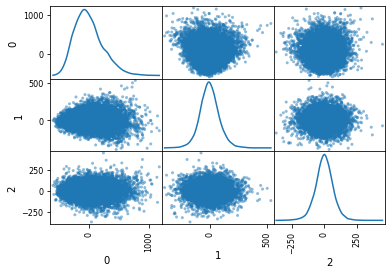

In [30]:
#Plotting Scatterplot of observations on FPC axes

_ = pd.plotting.scatter_matrix(pd.DataFrame(AP_GRF_stance_N_fpca_bs_proj), diagonal='kde')

In [31]:
pd.DataFrame(AP_GRF_stance_N_fpca_bs_proj).corr()

,0,1,2
0,1.000000e+00,3.451921e-16,5.463771e-16
1,3.451921e-16,1.000000e+00,-1.057449e-16
2,5.463771e-16,-1.057449e-16,1.000000e+00


## COPx_stance

Text(0.5, 1.0, 'Mean of COPx_stance')

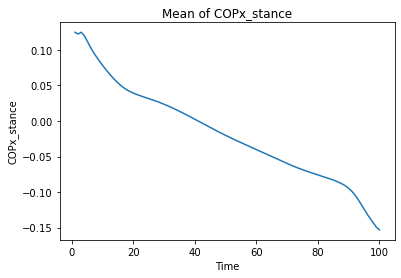

In [100]:
# Plotting mean
COPx_stance_mean = skfda.exploratory.stats.mean(COPx_stance_fd)
COPx_stance_mean.plot()
plt.xlabel('Time')
plt.ylabel('COPx_stance')
plt.title('Mean of COPx_stance')

In [101]:
#Basis representation
basis = skfda.representation.basis.BSpline(n_basis=7)
COPx_stance_fd = COPx_stance_fd.to_basis(basis)

In [102]:
#Fitting BSpline FPCA model
COPx_stance_fpca_bs = FPCA(n_components=2)
COPx_stance_fpca_bs.fit(COPx_stance_fd)

FPCA(n_components=2)

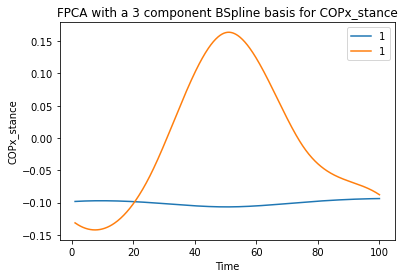

In [158]:
#Plotting FPCA components

COPx_stance_fpca_bs.components_.plot(label = '1')
plt.xlabel('Time')
plt.ylabel('COPx_stance')
plt.title('FPCA with a 3 component BSpline basis for COPx_stance')
plt.legend()

In [104]:
#Total variance explained

sum(COPx_stance_fpca_bs.explained_variance_ratio_)

0.969506633746373

In [105]:
#Component Loading

COPx_stance_fpca_bs.explained_variance_ratio_

array([0.94193909, 0.02756754])

In [106]:
#Transforming data into FPCA representation

COPx_stance_fpca_bs_proj = COPx_stance_fpca_bs.transform(COPx_stance_fd)

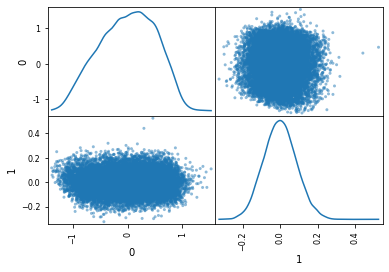

In [107]:
#Plotting Scatterplot of observations on FPC axes

_ = pd.plotting.scatter_matrix(pd.DataFrame(COPx_stance_fpca_bs_proj), diagonal='kde')

## COPy_stance


Text(0.5, 1.0, 'Mean of COPy_stance')

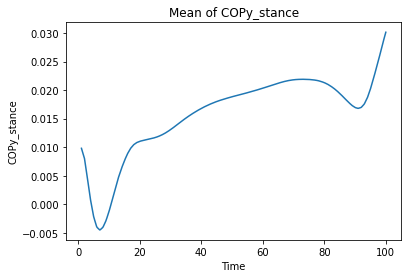

In [109]:
# Plotting mean
COPy_stance_mean = skfda.exploratory.stats.mean(COPy_stance_fd)
COPy_stance_mean.plot()
plt.xlabel('Time')
plt.ylabel('COPy_stance')
plt.title('Mean of COPy_stance')

In [110]:
#Basis representation
basis = skfda.representation.basis.BSpline(n_basis=7)
COPy_stance_fd = COPy_stance_fd.to_basis(basis)

In [111]:
#Fitting BSpline FPCA model

COPy_stance_fpca_bs = FPCA(n_components=2)
COPy_stance_fpca_bs.fit(COPy_stance_fd)

FPCA(n_components=2)

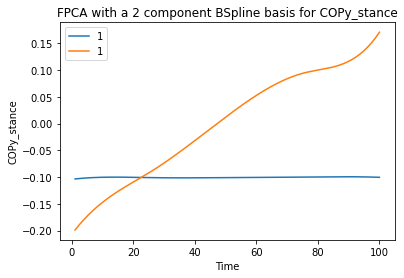

In [157]:
#Plotting FPCA components
COPy_stance_fpca_bs.components_.plot(label = '1')
plt.xlabel('Time')
plt.ylabel('COPy_stance')
plt.title('FPCA with a 2 component BSpline basis for COPy_stance')
plt.legend()

In [113]:
#Total variance explained

sum(COPy_stance_fpca_bs.explained_variance_ratio_)

0.9955724946218799

In [114]:
#Component Loading

COPy_stance_fpca_bs.explained_variance_ratio_

array([0.98662294, 0.00894955])

In [116]:
#Transforming data into FPCA representation

COPy_stance_fpca_bs_proj = COPy_stance_fpca_bs.transform(COPy_stance_fd)

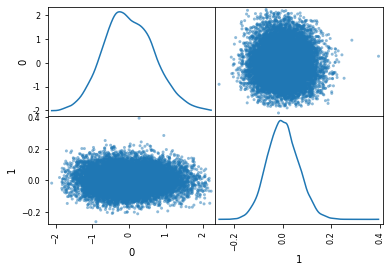

In [117]:
#Plotting Scatterplot of observations on FPC axes

_ = pd.plotting.scatter_matrix(pd.DataFrame(COPy_stance_fpca_bs_proj), diagonal='kde')

Text(0.5, 1.0, 'FPCA with a 5 component Fourier basis for VGRF_Stance_N')

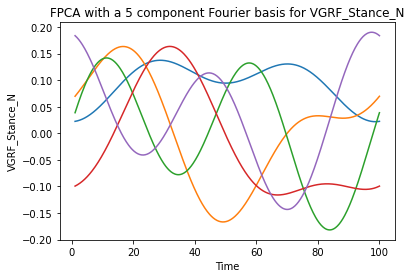

In [11]:
#Basis representation
basis = skfda.representation.basis.BSpline(n_basis=7)
V_GRF_stance_N_basis_fd = V_GRF_stance_N_fd.to_basis(basis)

V_GRF_stance_N_fpca_f = FPCA(n_components=5, components_basis=Fourier(n_basis=5))
V_GRF_stance_N_fpca_f.fit(V_GRF_stance_N_basis_fd)
V_GRF_stance_N_fpca_f.components_.plot()
plt.xlabel('Time')
plt.ylabel('VGRF_Stance_N')
plt.title('FPCA with a 5 component Fourier basis for VGRF_Stance_N')



In [12]:
V_GRF_stance_N_fpca_f.components_

FDataBasis(
    basis=Fourier(domain_range=((1.0, 100.0),), n_basis=5, period=99.0),
    coefficients=[[ 9.33557852e-01  2.53774983e-02 -2.55262838e-01  2.10985937e-04
      -2.50332894e-01]
     [ 9.56807859e-02  3.35599241e-01  8.07503772e-01  1.97957085e-01
      -4.32399107e-01]
     [ 2.42273764e-02  3.17872778e-01 -1.83580100e-01  8.76500160e-01
       3.10508853e-01]
     [-1.82051767e-01  8.33496271e-01 -3.68961489e-01 -2.97135779e-01
      -2.18446488e-01]
     [ 2.92549332e-01  3.01612324e-01  3.36071880e-01 -3.22909813e-01
       7.78607628e-01]],
    dataset_name=None,
    argument_names=(None,),
    coordinate_names=(None,),
    extrapolation=None)

FPCA(components_basis=Fourier(domain_range=((0, 1),), n_basis=5, period=1),
     n_components=5)